Inicializacja wielowymiarowej liczby dualnej

In [1]:
struct Dual{T <:Number} <: Number
    v::T
    dv::Vector{T}
end


Rozmiar chunka -> długości wektora dv

In [2]:
chunk_leng=10

10

Załadowanie danych uczacych i testujących

In [3]:
using MLDatasets

# load full training set
train_x = MNIST.testtensor(Float64)
train_y = MNIST.testlabels()

# load full test set
test_x,  test_y_dig  = MNIST.testdata()

(FixedPointNumbers.Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

FixedPointNumbers.Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

FixedPointNumbers.Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

...

FixedPointNumbers.Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

FixedPointNumbers.Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

FixedPointNumbers.Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N

Zmiana danych w bezie z jednej cyfry na 10 elementową tablicę zer i jedynek (np. 1 -> [1,0,0..])

In [ ]:
function class2percentage(train_set :: Array{Int64, 1})
    train_set_per = zeros(Float64, length(train_set), 10)
    for i=1:length(train_set)
        train_set_per[i, train_set[i]+1] = 1
    end
    return train_set_per
end

In [5]:
train_set_per = class2percentage(train_y)
test_y = class2percentage(test_y_dig)

10000×10 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 ⋮                        ⋮                   
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 1.0  0.0  0.0  0.0  0.0  

Operacje na liczbach dualnych

In [6]:
import Base: +, -, *, /
-(x::Dual) = Dual(-x.v,-x.dv)
+(x::Dual, y::Dual) = Dual( x.v + y.v, x.dv + y.dv)
-(x::Dual, y::Dual) = Dual( x.v - y.v, x.dv - y.dv)
+(x::Dual, y::Number) = Dual( x.v + y, x.dv)
-(x::Number, y::Dual) = Dual( y.v - x, y.dv)
+(x::Number, y::Dual) = Dual( y.v + x, y.dv)
-(x::Dual, y::Number) = Dual( x.v - y, x.dv)
*(x::Dual, y::Dual) = Dual( x.v * y.v, x.dv.* y.v + x.v.* y.dv)
*(x::Dual, y::Number) = Dual( x.v * y, x.dv.* y)
/(x::Dual, y::Dual) = Dual( x.v / y.v, (x.dv * y.v - x.v * y.dv)/y.v^2)
/(x::Dual, y::Number) = Dual( x.v / y, x.dv/y)
*(x::Number, y::Dual) = Dual( y.v * x, y.dv * x)
/(x::Number, y::Dual) = Dual( y.v / x, y.dv/x)

import Base: abs, sin, cos, tan, exp, sqrt, isless
abs(x::Dual) = Dual(abs(x.v),sign(x.v)*x.dv)
sin(x::Dual) = Dual(sin(x.v), cos(x.v)*x.dv)
cos(x::Dual) = Dual(cos(x.v),-sin(x.v)*x.dv)
tan(x::Dual) = Dual(tan(x.v), one(x.v)*x.dv + tan(x.v)^2*x.dv)
exp(x::Dual) = Dual(exp(x.v), exp(x.v)*x.dv)
sqrt(x::Dual) = Dual(sqrt(x.v),.5/sqrt(x.v) * x.dv)
isless(x::Dual, y::Dual) = x.v < y.v;

import Base: show
show(io::IO, x::Dual) = print(io, "(", x.v, ") + [", x.dv, "ϵ]");
value(x::Dual) = x.v;
partials(x::Dual) = x.dv;

import Base: convert, promote_rule

convert(::Type{Dual{T}}, x::Dual) where T =
Dual(convert(T, x.v), convert(Vector{T}, x.dv))

convert(::Type{Dual{T}}, x::Number, len::Number) where T =
Dual(convert(T, x), zeros(T,len))

convert(::Type{Dual{T}}, x::Number) where T =
Dual(convert(T, x), zeros(T,chunk_leng))

promote_rule(::Type{Dual{T}}, ::Type{R}) where {T,R} =
Dual{promote_type(T,R)}


promote_rule (generic function with 141 methods)

Jakobian dla liczb wielowymiarowych. Różniczkowanie w przód.

In [7]:
J = function jacobian(f, chunk_leng, args::Vector{T}) where {T <:Number}
    jacobian_columns = Matrix{T}[]
    for i=1:ceil(length(args)/chunk_leng)
        x = Dual{T}[]
        for j=1:length(args)
            seed = (j > (i-1) * chunk_leng && j <= i*chunk_leng)
            if seed
                oney = zeros(Float64, chunk_leng)
                index = mod(j -1, chunk_leng)
                oney[index + 1] = 1
                push!(x, Dual(args[j], oney))
            else
                push!(x, Dual(args[j], zeros(Float64, chunk_leng)))
            end
        end
        column = partials.(f(x))
#         println(column[1])
#         println(typeof(column))
#         println(typeof(column[:,:]))
        push!(jacobian_columns, column[1][:,:])
#         println(typeof(jacobian_columns))
    end
    hjacobian = hcat(jacobian_columns...)
    return hjacobian
end

jacobian (generic function with 1 method)

Algorytm optymalizacyjny -> Algorytm Adagrad

In [8]:
abstract type DescentMethod end
struct GradientDescent <: DescentMethod
 α # learning rate
end

In [9]:
mutable struct Adagrad <: DescentMethod
 α # learning rate
 ϵ # small value
 s # sum of squared gradient
 Adagrad() = new() # new uninitialized structure
end

function init!(M::Adagrad, θ, α=0.01, ϵ=1e-8)
 M.α = α
 M.ϵ = ϵ
 M.s = zero(θ)
 return M
end

init! (generic function with 3 methods)

In [10]:
function softmax!(y)
    sum_y = sum(exp.(y))
    for i=1:length(y)
        y[i] = exp.(y[i]) ./sum_y
    end
end

softmax! (generic function with 1 method)

Inicjalizacja dwóch warstw sieci.

In [11]:
Wh= randn(30, 784)
Wo= randn(10, 30)

10×30 Array{Float64,2}:
  0.440673  -1.58459    1.19288   …   1.59945    0.610456  -0.164185
 -0.133642  -0.874322   2.93274       0.56968   -0.524263  -1.48242
 -1.47942   -2.15158   -1.0992       -0.545105   0.990671   0.0493049
  0.461179   1.17335    0.381662      2.12403   -0.276991   0.91886
  1.63469   -0.34108    1.53485      -0.041627   0.61248    0.339497
  0.87459   -0.356762   0.861888  …  -0.688526   0.503219   0.396841
  0.776272  -0.679253  -0.13752      -2.60068    1.00538   -0.0332172
  0.79388    0.548425  -2.37252       1.54324   -0.919655   2.30821
 -0.138719   0.519731   0.227348      1.2087     1.7585    -0.813552
 -0.756666  -1.19667    1.55634       0.535927   0.328388  -0.234121

In [12]:
epochs = 1000

dense(w, n, m, v, f) = f.(reshape(w, n, m) * v)
mean_squared_loss(y, ŷ) = sum(0.5(y - ŷ).^2)
σ(x)= one(x) / (one(x) + exp(-x))
linear(x) = x

y_pred = []
dWh = similar(Wh)
dWo = similar(Wo)
step_val = similar(Wh)
step_val = similar(Wo)

x_conv = Array{Dual{Float64}}(undef, 784, 1) 
E = Array{Float64, 2}(undef, epochs, 10)

function net(x, wh, wo, y, chun_len)
    d =reshape(wh, 30,784)
    x̂ = dense(d, 30, 784, x, linear)
    ŷ = dense(wo, 10, 30, x̂ , σ)
    softmax!(ŷ)
    push!(y_pred, ŷ)
    E = mean_squared_loss.(y, ŷ)
    return E
end
dnet_Wh(x, wh, wo, y) = J(w -> net(x, w, wo, y, chunk_leng), chunk_leng, wh);
dnet_Wo(x, wh, wo, y) = J(w -> net(x, wh, w, y, chunk_leng), chunk_leng, wo); 

x = train_x[:,:,1]
m = Adagrad()
Mh = init!(m, Wh)
m1 = Adagrad()
Mo = init!(m1, Wo)

for i=1:epochs
    println(i)
    x = train_x[:,:,i]
    x = x[:]
    y = train_set_per[i, :]
    dWh[:] = dnet_Wh(x, Wh[:], Wo[:], y)
    dWo[:] = dnet_Wo(x, Wh[:], Wo[:], y)
    
    α, ϵ, s, g = Mh.α, Mh.ϵ, Mh.s, dWh
    s += g.*g
    Mh.s = s
    step_val = - α*g ./ (sqrt.(s) .+ ϵ)
    Wh = Wh - step_val
    
    oα, oϵ, os, og = Mo.α, Mo.ϵ, Mo.s, dWo
    os += og.*og
    Mo.s = os
    step_valo = - oα*og ./ (sqrt.(os) .+ oϵ)
    Wo = Wo - step_valo
    
    Ei = net(x, Wh[:], Wo[:], y, chunk_leng)
    E[[i],:]= Ei
end
    

1
1000


Testy

In [13]:
y_predicted_list = Int64[]

0-element Array{Int64,1}

In [14]:
test_len = 100
dense(w, n, m, v, f) = f.(reshape(w, n, m) * v)
mean_squared_loss(y, ŷ) = sum(0.5(y - ŷ).^2)
σ(x)= one(x) / (one(x) + exp(-x))
linear(x) = x
E_test = Array{Float64, 2}(undef, test_len, 10) 

function net(x, wh, wo, y)
    x̂ = dense(wh, 30, 784, x, σ)
    ŷ = dense(wo, 10, 30, x̂ , linear)
    softmax!(ŷ)
    println(y)
    println(ŷ)
    E = mean_squared_loss.(y, ŷ)

    return ŷ, E
end

for i=1:test_len
    x = test_x[:,:,i]
    x = x[:]
    y = test_y[i,:]
    y_predicted, Ei = net(x, Wh[:], Wo[:], y)
    println("oczekiwana wartość:", test_y_dig[i], "co wyszło:", argmax(y_predicted)-1)
    push!(y_predicted_list, argmax(y_predicted)-1)
    println(Ei)
    E_test[[i],:]= Ei
end
println(y_predicted_list)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
[0.5454401009205931, 0.005219569924670727, 0.004858290353692613, 0.006026659770437931, 8.277156705912282e-6, 0.08518275949600523, 9.030079524524833e-5, 0.2688132595873998, 0.06419988621348909, 0.020160895781760512]
oczekiwana wartość:7co wyszło:0
[0.14875245184613342, 1.362195509926359e-5, 1.1801492580391346e-5, 1.8160313994307486e-5, 3.4255661567114326e-11, 0.003628051257677135, 4.0771168109621315e-9, 0.2673170246776016, 0.002060812694912473, 0.0002032308593615044]
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.17136819571950257, 7.024795322113185e-5, 0.00013050830627736712, 0.00686063749505252, 5.5268890243289134e-5, 0.6252990700404166, 1.845780159170472e-6, 0.06438943795328606, 0.12284454398082548, 0.008980243881015903]
oczekiwana wartość:2co wyszło:5
[0.014683529252078869, 2.4673874658791642e-9, 0.49986950020993165, 2.3534173419260257e-5, 1.5273251143623705e-9, 0.19549946349670494, 1.7034521979936866e-12, 0.00207299985997003

[0.029136082504867294, 0.00021493607613733183, 2.699132658347412e-7, 0.00032923928697974926, 0.002768454940218969, 0.002631632123173705, 5.239214057766114e-6, 0.9346617410215935, 0.013479789121324451, 0.016772615798381327]
oczekiwana wartość:4co wyszło:7
[0.00042445565186521704, 2.3098758412656455e-8, 3.642658553678783e-14, 5.4199254045466845e-8, 0.49723537723115907, 3.4627438158598707e-6, 1.3724681971547033e-11, 0.43679628506475815, 9.085235737768851e-5, 0.00014066032036005546]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.03817830452209464, 6.796538456504369e-5, 0.0001859507900824698, 0.002653445931748465, 0.0006183781789311089, 0.7729945152701422, 0.0019592978863098, 0.011343680616240841, 0.0910577630936448, 0.08094069832624075]
oczekiwana wartość:9co wyszło:5
[0.0007287914680908961, 2.309646749537139e-9, 1.7288848166147373e-8, 3.5203876563562404e-6, 1.9119578608907727e-7, 0.29876026031886105, 1.9194241036490247e-6, 6.43395449616391e-5, 0.004145758109809171, 0.42233499999652

[1.0002163415350058e-6, 3.7433179402366656e-7, 0.49996996117625064, 6.790805773528087e-6, 7.485011092534116e-8, 0.32221108390378517, 6.56075051307111e-13, 3.890008226884133e-6, 1.0671830186350382e-8, 0.01765743309902701]
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.9676664421190477, 3.3693792828033663e-5, 0.00010684164354555482, 0.001426512849847612, 2.5397043954163996e-5, 0.020456532644938085, 1.423710926360485e-5, 0.0005480493941095345, 0.008588706080414461, 0.001133587322051246]
oczekiwana wartość:1co wyszło:0
[0.4681891716016682, 0.4999663067748078, 5.707568397757698e-9, 1.0174694553901777e-6, 3.22504920804869e-10, 0.00020923486392670877, 1.0134764009191151e-10, 1.5017906919191395e-7, 3.688293606787417e-5, 6.425101083576577e-7]
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.07079390556757943, 0.00026146857460144525, 7.836877502276263e-6, 0.012512572701442723, 0.006475407504623676, 0.017749512270779026, 0.0011905308793909507, 0.0023070310172532906, 0.0076340231036077

[0.00447832159338753, 0.0024884049481987305, 0.00010320208999088128, 0.08404736229017878, 0.0009982860917211332, 0.11311820615896297, 7.396300504632175e-6, 0.08660282930320023, 0.2661105544727522, 0.44204543675110297]
oczekiwana wartość:0co wyszło:9
[0.49553170608875935, 3.0960795931099634e-6, 5.3253356892429785e-9, 0.0035319795539682833, 4.982875604619274e-7, 0.006397864282310824, 2.7352630577411085e-11, 0.0037500250216596187, 0.035407413600897816, 0.09770208407623669]
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0025141295541919813, 0.04372345466549314, 0.00013981862365777844, 0.0011140471284000711, 0.00010780394708468756, 0.1872032981875896, 0.006995211632762771, 0.020349893697165493, 0.014723840108349855, 0.7231285024553046]
oczekiwana wartość:2co wyszło:9
[3.1604237076307854e-6, 0.000955870243942717, 0.499860191150966, 6.205505021482222e-7, 5.810845503519057e-9, 0.017522537426155792, 2.44664928935698e-5, 0.00020705908674296792, 0.00010839573376812594, 0.2614574155316257]


[0.0034603016550101926, 8.913305538137939e-7, 1.535319814504617e-10, 0.08253313146996204, 2.776815992381657e-9, 0.0012163990953257269, 3.9838366267674244e-10, 0.017329138273787494, 0.0006890758872526086, 0.001201660144360197]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
[0.2977178502010033, 0.0025580890433567808, 0.0002166238294216534, 0.005373151347313078, 0.00010342998409435416, 0.49193801374125645, 0.00534730296492937, 0.09169543624490968, 0.038650013587756896, 0.06640008905595843]
oczekiwana wartość:6co wyszło:5
[0.044317959164153514, 3.271909776871005e-6, 2.3462941736650794e-8, 1.4435377700566173e-5, 5.3488808048791775e-9, 0.12100150468184631, 0.49466699385957, 0.004204026514072148, 0.0007469117751668963, 0.0022044859133196052]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.08601197643688312, 0.004074924540082933, 0.004239794047459492, 0.0007869787854182036, 0.00014563914546728837, 0.620559038082795, 0.0017342965529929125, 0.00014954009741429794, 0.008461567742424408,

1:100
100
100
[7 0; 2 5; 1 0; 0 7; 4 7; 1 5; 4 9; 9 0; 5 0; 9 5; 0 8; 6 8; 9 8; 0 9; 1 0; 5 0; 9 9; 7 7; 3 7; 4 7; 9 5; 6 5; 6 5; 5 0; 4 9; 0 9; 7 7; 4 9; 0 5; 1 0; 3 5; 1 9; 3 0; 4 3; 7 5; 2 0; 7 9; 1 9; 2 5; 1 0; 1 9; 7 7; 4 8; 2 0; 3 5; 5 9; 1 0; 2 7; 4 0; 4 5; 6 5; 3 5; 5 5; 5 9; 6 9; 0 9; 4 9; 1 0; 9 7; 5 8; 7 8; 8 0; 9 9; 3 8; 7 5; 4 0; 6 9; 4 9; 3 0; 0 7; 7 9; 0 9; 2 9; 9 5; 1 0; 7 0; 3 0; 2 9; 9 9; 7 9; 7 9; 6 9; 2 7; 7 9; 8 0; 4 7; 7 0; 3 9; 6 9; 1 5; 3 3; 6 5; 9 5; 3 0; 1 0; 4 7; 1 9; 7 5; 6 9; 9 7]


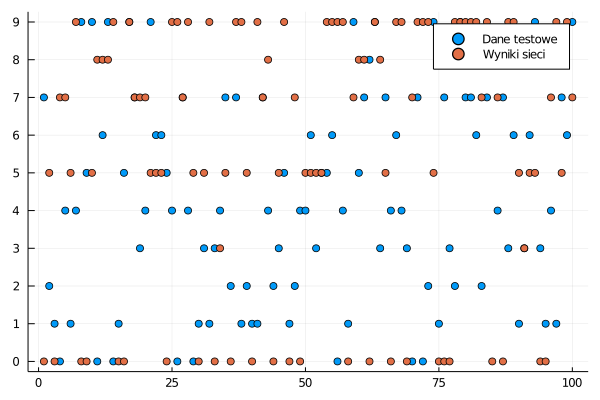

In [16]:
using Plots
x = 1:test_len
println(x)
y = test_y_dig[1:test_len]
println(length(y))
println(length(y_predicted_list))
y_data = hcat(y, y_predicted_list)
println(y_data)
plot(x,y_data, yticks = 0:1:10, seriestype = :scatter, label = ["Dane testowe" "Wyniki sieci"], lw = 10)

Błąd w kolejnych iteracjach podczas uczenia.

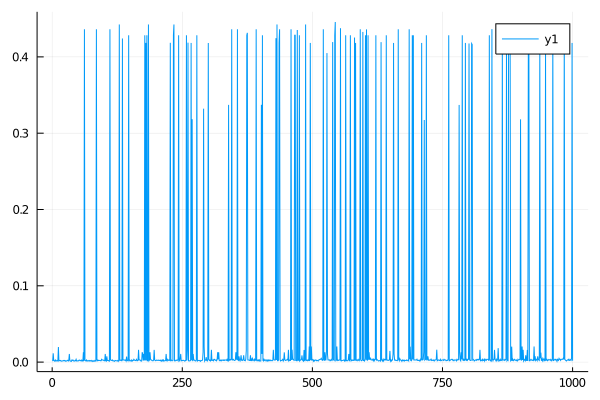

In [23]:
using Plots
x = 1:epochs
plot(x,E[:,9])